<a href="https://colab.research.google.com/github/mashnoor3/data-science-portfolio/blob/main/Super_Bowl_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super Bowl - Exploratory Data Analysis

In this notebook we will look at historical data for superbowls, including game scores, tv ratings, and halftime performances. The goal is to understand how some of the elements interact with each other. Mainly we are going to answer questions like: 
- What are the most extreme game outcomes?
- How does the game affect television viewership?
- How have viewership, TV ratings, and ad cost evolved over time?
- Who are the most prolific musicians in terms of halftime show performances?

In [135]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [136]:
!pip -q install fsspec # File-system specification
!pip -q install gcsfs # Convenient Filesystem interface over GCS

In [138]:
gs_bucket = 'gs://mashnoor-data-science-portfolio/'

super_bowls = pd.read_csv(gs_bucket + 'super_bowls.csv', encoding='utf-8')
tv = pd.read_csv(gs_bucket + 'tv.csv', encoding='utf-8')
halftime_musicians = pd.read_csv(gs_bucket + 'halftime_musicians.csv', encoding='utf-8')

display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts,Unnamed: 18
0,2/4/2018,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8,NaN
1,2/5/2017,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6,NaN
2,2/7/2016,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14,NaN
3,2/1/2015,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4,NaN
4,2/2/2014,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35,NaN


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


# Missing data
From looking at just the head of the super bowl dataset, we can note missing data for qb_winner_2 and qb_loser_2. There must be other missing data as well. Let's inspect the null data, and deal with them.

In [9]:
super_bowls.info()
print('\n')
tv.info()
print('\n')
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            52 non-null     object 
 1   super_bowl      52 non-null     int64  
 2   venue           52 non-null     object 
 3   city            52 non-null     object 
 4   state           52 non-null     object 
 5   attendance      52 non-null     int64  
 6   team_winner     52 non-null     object 
 7   winning_pts     52 non-null     int64  
 8   qb_winner_1     52 non-null     object 
 9   qb_winner_2     2 non-null      object 
 10  coach_winner    52 non-null     object 
 11  team_loser      52 non-null     object 
 12  losing_pts      52 non-null     int64  
 13  qb_loser_1      52 non-null     object 
 14  qb_loser_2      3 non-null      object 
 15  coach_loser     52 non-null     object 
 16  combined_pts    52 non-null     int64  
 17  difference_pts  52 non-null     int64

# Combined points distribution

For the TV data, the following columns have missing values and a lot of them:

- total_us_viewers (amount of U.S. viewers who watched at least some part of the broadcast)
- rating_18_49 (average % of U.S. adults 18-49 who live in a household with a TV that were watching for the entire broadcast)
- share_18_49 (average % of U.S. adults 18-49 who live in a household with a TV in use that were watching for the entire broadcast)

For the halftime musician data, there are missing numbers of songs performed (num_songs) for about a third of the performances.

Let's take note of where the dataset isn't perfect and start uncovering some insights.

Let's start by looking at combined points for each Super Bowl by visualizing the distribution. Let's also pinpoint the Super Bowls with the highest and lowest scores.

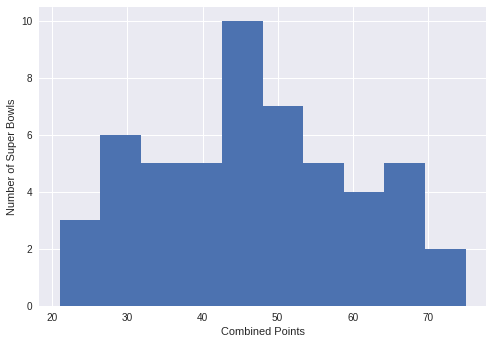

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts,Unnamed: 18
0,2/4/2018,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8,NaN
23,1/29/1995,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23,NaN


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts,Unnamed: 18
43,1/12/1975,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10,NaN
45,1/14/1973,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7,NaN
49,1/12/1969,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9,NaN


In [21]:
plt.style.use('seaborn')

# Plot a histogram of combined points
plt.hist(super_bowls['combined_pts'])
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

# Point difference distribution

Most combined scores are around 40-50 points, with the extremes being roughly equal distance away in opposite directions. Going up to the highest combined scores at 74 and 75, we find two games featuring dominant quarterback performances. One even happened recently in 2018's Super Bowl LII where Tom Brady's Patriots lost to Nick Foles' underdog Eagles 41-33 for a combined score of 74.

Going down to the lowest combined scores, we have Super Bowl III and VII, which featured tough defenses that dominated. We also have Super Bowl IX in New Orleans in 1975, whose 16-6 score can be attributed to inclement weather. The field was slick from overnight rain, and it was cold at 46 °F (8 °C), making it hard for the Steelers and Vikings to do much offensively. This was the second-coldest Super Bowl ever and the last to be played in inclement weather for over 30 years. The NFL realized people like points, I guess.

UPDATE: In Super Bowl LIII in 2019, the Patriots and Rams broke the record for the lowest-scoring Super Bowl with a combined score of 16 points (13-3 for the Patriots).

Let's take a look at point difference now.

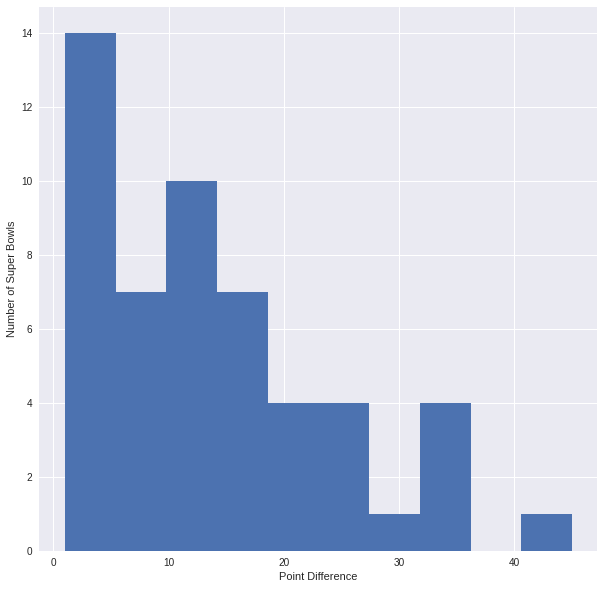

45

1

In [57]:
# Histogram of point differences
fig, ax = plt.subplots(figsize=(10, 10))
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

# Displaying the closest game(s) and biggest blowouts
display(super_bowls.difference_pts.max())
display(super_bowls.difference_pts.min())

# Do large point differences (blowout games) lead to lost viewers?

Let's combine our game data and TV to see if this is the case. Do large point differences translate to lost viewers? We can plot household share (average percentage of U.S. households with a TV in use that were watching for the entire broadcast) vs. point difference to find out.

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost,date,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts,Unnamed: 18
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000,2/4/2018,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8,NaN
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000,2/5/2017,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6,NaN
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000,2/7/2016,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14,NaN
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000,2/1/2015,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4,NaN
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000,2/2/2014,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35,NaN


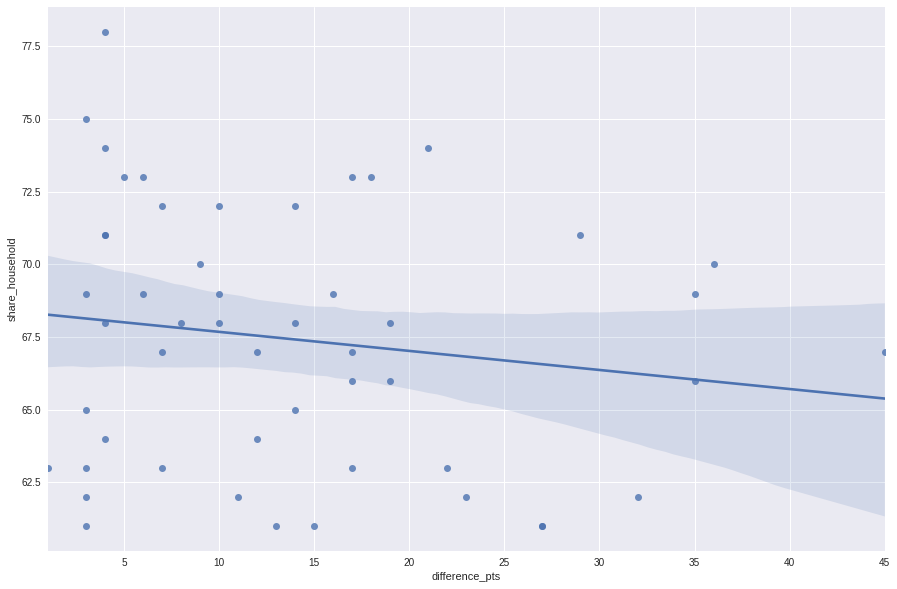

In [107]:
# Join game and TV data, filtering out super bowl 1 because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')
display(games_tv.head())

# Vislualizing with linear regression
# fig, ax = plt.subplots(figsize=(15, 10))
plt.figure(figsize = (15,10))
sns.regplot(x=games_tv['difference_pts'], y=games_tv['share_household'], data=games_tv)
plt.show()

# Viewership and the ad industry over time 

The downward sloping regression line and the 95% confidence interval for that regression suggest that bailing on the game if it is a blowout is common. Though it matches our intuition, we must take it with a grain of salt because the linear relationship in the data is weak due to our small sample size of 52 games.

Regardless of the score though, I bet most people stick it out for the halftime show, which is good news for the TV networks and advertisers. A 30-second spot costs a pretty [$5 million](https://www.businessinsider.com/super-bowl-commercials-cost-more-than-eagles-quarterback-earns-2018-1) now, but has it always been that way? And how have number of viewers and household ratings trended alongside ad cost? We can find out using line plots that share a "Super Bowl" x-axis.

From the plots, below we can see that viewers increased before ad costs did. Maybe the networks weren't very data savvy and were slow to react? 

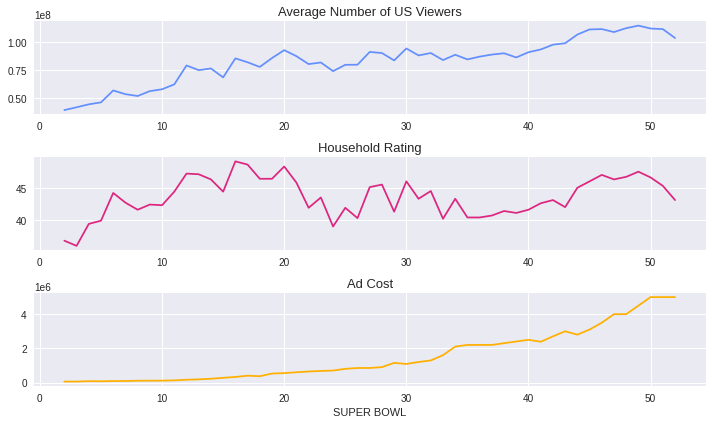

In [68]:
plt.figure(figsize = (10,6))

# Create a figure with 3x1 subplot and activate the top subplot
plt.subplot(3, 1, 1)
plt.plot(games_tv['super_bowl'], games_tv['avg_us_viewers'], color='#648FFF')
plt.title('Average Number of US Viewers', fontsize=13)

# # Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(games_tv['super_bowl'], games_tv['rating_household'], color='#DC267F')
plt.title('Household Rating', fontsize=13)

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(games_tv['super_bowl'], games_tv['ad_cost'], color='#FFB000')
plt.title('Ad Cost', fontsize=13)
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

# Analysis of halftime shows

Another hypothesis: maybe halftime shows weren't that good in the earlier years? The modern spectacle of the Super Bowl has a lot to do with the cultural prestige of big halftime acts.

It turns out Michael Jackson's Super Bowl XXVII performance, one of the most watched events in American TV history, was when the NFL realized the value of Super Bowl airtime and decided they needed to sign big name acts from then on out. The halftime shows before MJ indeed weren't that impressive, which we can see by filtering our halftime_musician data.

In [70]:
display(halftime_musicians[halftime_musicians['super_bowl']<=27])

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


<Figure size 720x720 with 0 Axes>

# Musicians with most halftime show appearances 

Let's see all of the musicians that have done more than one halftime show, including their performance counts.

In [98]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('musician').count()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

display(halftime_appearances[halftime_appearances['super_bowl']>1])

,super_bowl,num_songs
musician,,
Grambling State University Tiger Marching Band,6,2
Up with People,4,0
Al Hirt,4,0
The Human Jukebox,3,0
Spirit of Troy,2,1
Florida A&M University Marching 100 Band,2,0
Gloria Estefan,2,2
University of Minnesota Marching Band,2,1
Bruno Mars,2,2


# Who performed the most songs in a halftime show?

The world famous Grambling State University Tiger Marching Band takes the crown with six appearances. Beyoncé, Justin Timberlake, Nelly, and Bruno Mars are the only post-Y2K musicians with multiple appearances (two each).

From our previous inspections, the num_songs column has lots of missing values:

A lot of the marching bands don't have num_songs entries.
For non-marching bands, missing data starts occurring at Super Bowl XX.
Let's filter out marching bands by filtering out musicians with the word "Marching" in them and the word "Spirit" (a common naming convention for marching bands is "Spirit of [something]"). Then we'll filter for Super Bowls after Super Bowl XX to address the missing data issue, then let's see who has the most number of songs.

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0
5,50,Bruno Mars,3.0


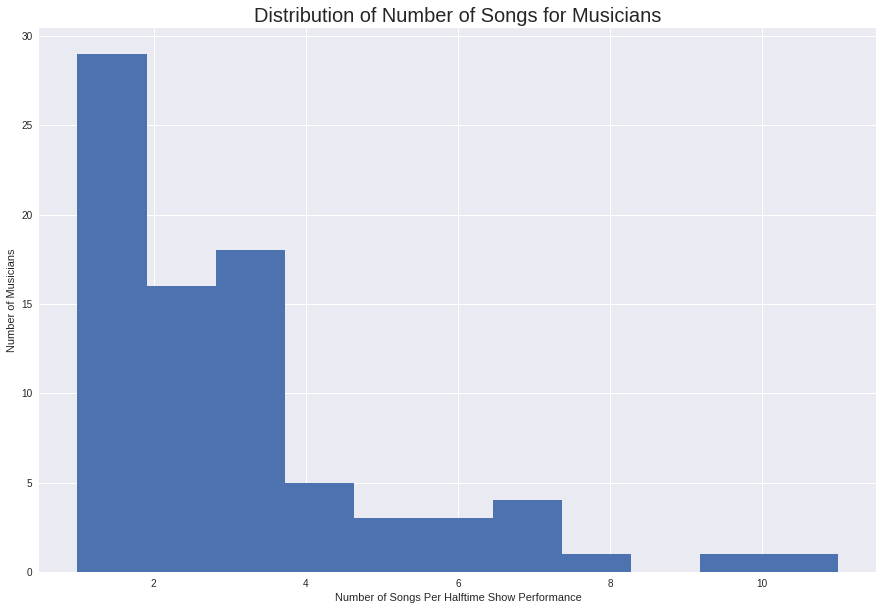

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [119]:
# Filter out most marching bands
no_bands = halftime_musicians[~halftime_musicians['musician'].str.contains('Marching')]
no_bands = no_bands[~no_bands['musician'].str.contains('Spirit')]

display(no_bands.head())

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.figure(figsize = (15,10))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.title('Distribution of Number of Songs for Musicians', fontsize=20)
plt.show()

# Sort the non-band musicians by number of songs per appearance...
no_bands = no_bands.sort_values('num_songs', ascending=False)
# Display the top 15
display(no_bands.head(15))

# Conclusion

So most non-band musicians do 1-3 songs per halftime show. It's important to note that the duration of the halftime show is fixed (roughly 12 minutes) so songs per performance is more a measure of how many hit songs you have. JT went off in 2018, wow. 11 songs! Diana Ross comes in second with 10 in her medley in 1996.

In this notebook, we loaded, cleaned, then explored Super Bowl game, television, and halftime show data. We visualized the distributions of combined points, point differences, and halftime show performances using histograms. We used line plots to see how ad cost increases lagged behind viewership increases. And we discovered that blowouts do appear to lead to a drop in viewers.